# **Import dependecies**

In [1]:
import pandas as pd

# **Import Dataset**

The dataset being used is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the Twitter API. The tweets have been annotated (0 = Negative, 4 = Positive) and they can be used to detect sentiment.

[The training data isn't perfectly categorised as it has been created by tagging the text according to the emoji present. So, any model built using this dataset may have lower than expected accuracy, since the dataset isn't perfectly categorised.]

It contains the following 6 fields:

    1.sentiment: the polarity of the tweet (0 = negative, 4 = positive)

    2.ids: The id of the tweet (2087)

    3.date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

    4.flag: The query (lyx). If there is no query, then this value is NO_QUERY.

    5.user: the user that tweeted (robotickilldozr)

    6.text: the text of the tweet (Lyx is cool)

We require only the sentiment and text fields, so we discard the rest.

Furthermore, we're changing the sentiment field so that it has new values to reflect the sentiment. (0 = Negative, 1 = Positive)

In [2]:
#Importing the dataset
DATASET_ENCODING = "ISO-8859-1"
DATASET_COLUMNS = ["sentiment","id","date","flag","user","text"]
twitter_dataset = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
twitter_dataset

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
#Removing the unnecessary columns
twitter_dataset = twitter_dataset[["sentiment","text"]]
#Replacing the values in sentiment columns (because negative sentiment = 4)
twitter_dataset["sentiment"] = twitter_dataset["sentiment"].replace(4,1)
twitter_dataset

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3852\1537827797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_dataset["sentiment"] = twitter_dataset["sentiment"].replace(4,1)


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

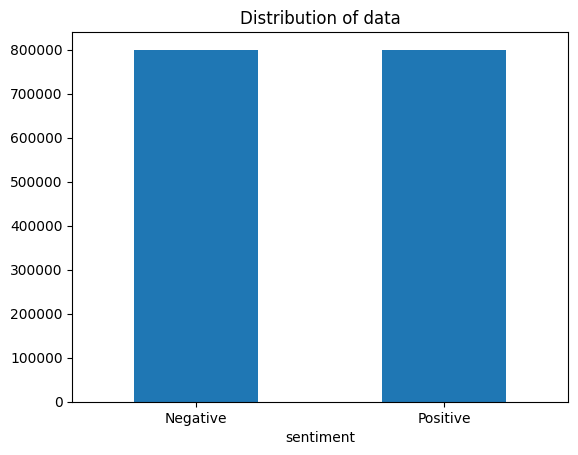

In [4]:
#Plotting the dataset
ax = twitter_dataset.groupby("sentiment").count().plot(kind="bar", title="Distribution of data", legend=False)
ax.set_xticklabels(["Negative", "Positive"], rotation=0)

# **Preprocess Text**

Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

The preprocessing steps are :

    1.Lower Casing: Each text is converted to lowercase.

	2.Replacing URLs: Links starting with "http" or "https" or "www" are replaced with "URL".

	3.Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning.

	4.Replacing Usernames: Replace @Usernames with word "USER".

	5.Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.

	6.Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters.

	7.Removing Short Words: Words with length less than 2 are removed.

	8.Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrifing the meaning of the sentence.
	
	9.Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g "Great" to "Good").

In [5]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

text, sentiment = list(twitter_dataset["text"]), list(twitter_dataset["sentiment"])

In [6]:
import re
import nltk
nltk.download('wordnet')
# nltk
from nltk.stem import WordNetLemmatizer

def preprocessData(data):
    processData = []

    #Create Lemmatizer and Stemmer
    wordLemm = WordNetLemmatizer()

    #Defining regex patterns
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in data:
        #Lower Casing: Each text is converted to lowercase.
        tweet = tweet.lower()

        #Replacing URLs: Links starting with "http" or "https" or "www" are replaced with "URL".
        tweet = re.sub(urlPattern, "URL", tweet)

        #Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI"+emojis[emoji])

        #Replacing Usernames: Replace @Usernames with word "USER".
        tweet = re.sub(userPattern, "USER", tweet)

        #Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.
        tweet = re.sub(alphaPattern, " ", tweet)

        #Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetWords = ""
        for word in tweet.split():
            if len(word) > 1:
                #Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g "Great" to "Good")
                word = wordLemm.lemmatize(word)
                tweetWords += (word + " ")
        processData.append(tweetWords)
    return processData

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
import time
t = time.time()
processedData = preprocessData(text)
print("Text PreProcessing Completed")
print(f"Time Taken {round(time.time() - t)} seconds")

Text PreProcessing Completed
Time Taken 97 seconds


# **Analysing Data**

In this step we are going to use Word Clouds to see our data after preprocessing

wordcloud for negative data

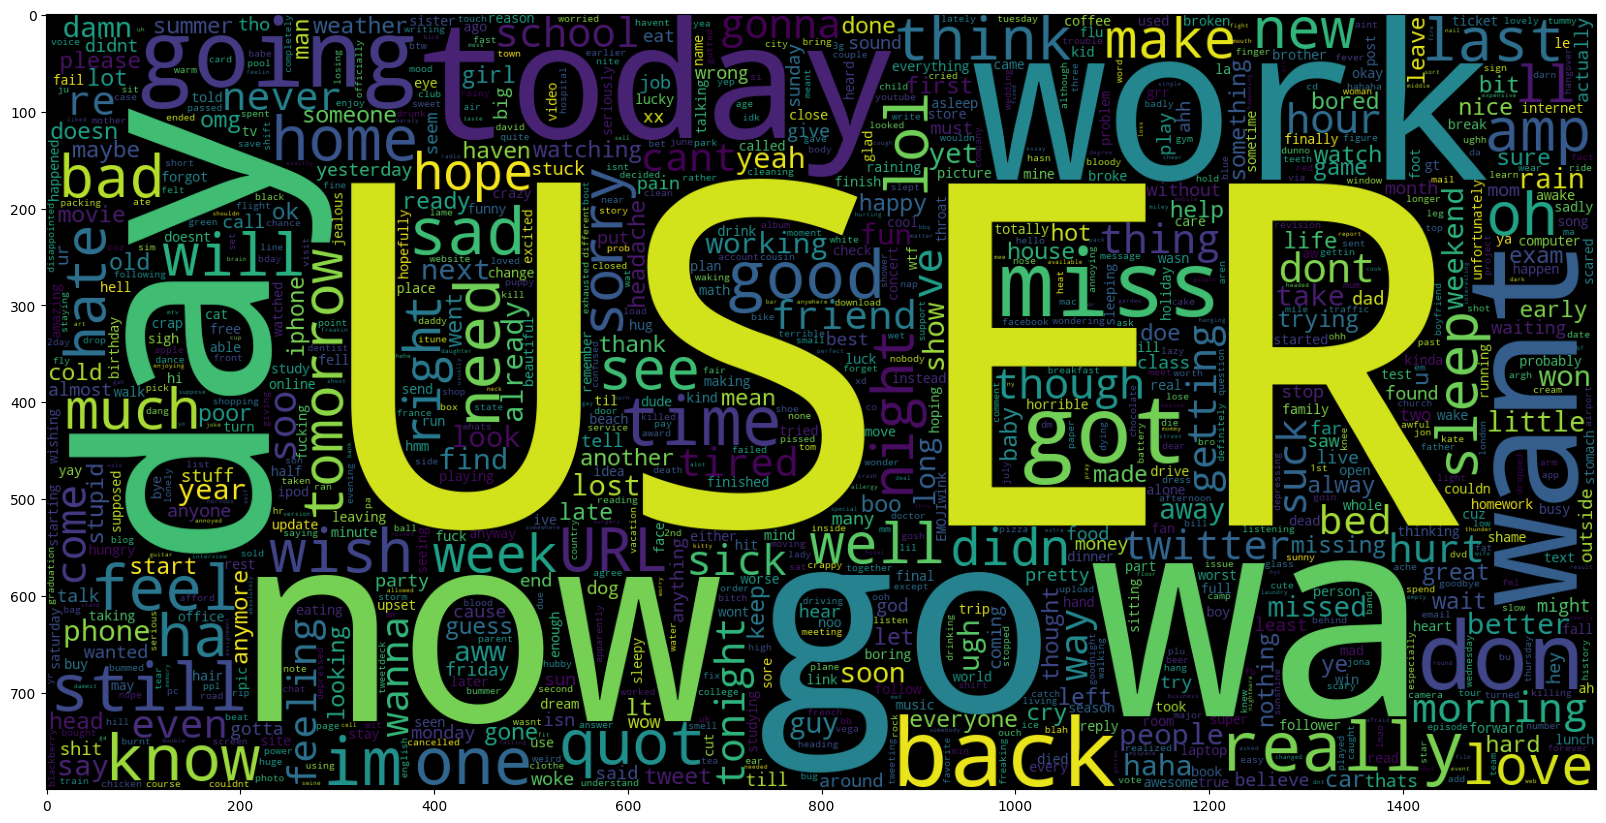

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_neg = processedData[:800000]
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

wordcloud for positive data

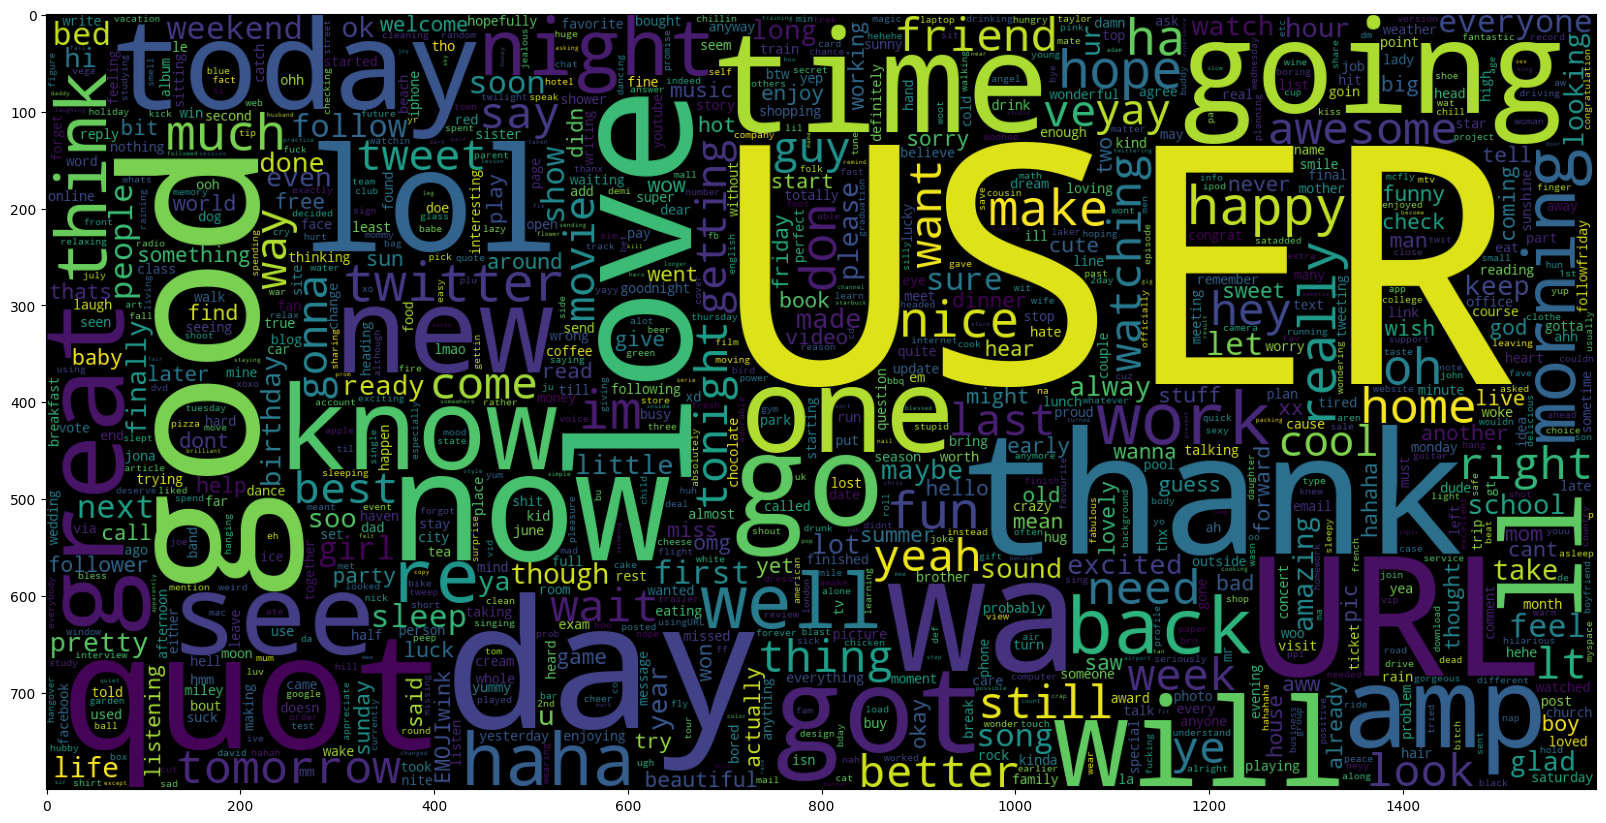

In [9]:
data_pos = processedData[800000:]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

# **Splitting Data**

The Preprocessed data will be splited into 2 parts:
- Training Data : Contains 95% of data.
- Test Data: Contains 5% of data.

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processedData, sentiment, test_size=0.05, random_state=0)
print("Data split done.")

Data split done.


# **Transforming Data**

TF-IDF Vectoriser:

	- TF: Term Frequnecy: it measures how often a word appears in a document.

	- IDF: Inverse Document Frequnecy: It measures how unique or rare word is across multiple documents.

	- TF-IDF score: It is the product of TF and IDF. It indicates the importance ot a word in a doucment or dataset.

	- TF-IDF Vectorizer converts a collection of raw documents to a matrix of TF-IDF Features. The Vectorizer is usually trained on only the X_train dataset.

	- ngram_range: is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)].
    
	- max_features: Specifies the number of features to consider.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print("Vectoriser Fitted")

Vectoriser Fitted


# **Transforming data**

- Transforming the X_train and X_test dataset to a matrix of TF-IDF Features by using TF-IDF Vectorizer.

In [12]:
x_train = vectoriser.transform(x_train)
x_test = vectoriser.transform(x_test)
print("Data Transformed")

Data Transformed


# **Creating and Evaluating the models**

- In this step we are going to create 3 different types of model:

		*Bernoulli Naive Bayes (BernoulliNB)

		*Linear Support Vector Classification (LinearSVC)

		*Logistic Regression (LR)
		
	- After creating the model, we are going to show the Classification Report and then the Confusion Matrix.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb

- Model creation and evaluation function

In [14]:
def modelEvaluate(model):

    #Predict values based on test data
    y_pred = model.predict(x_test)

    #Get the classifaction repport
    print(classification_report(y_test, y_pred))

    #Compute and plot confusion metrix
    cm = confusion_matrix(y_test, y_pred)

    categories = ["Negative","Positive"]

    sb.heatmap(cm, cmap="Blues",annot=True, fmt="", yticklabels=categories)
    plt.xlabel("Predicted Values", labelpad=10, fontdict={"size":14})
    plt.ylabel("Actual Values", labelpad=10, fontdict={"size":14})
    plt.title("Confusion matrix", pad=10, fontdict={"size":18})

- Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



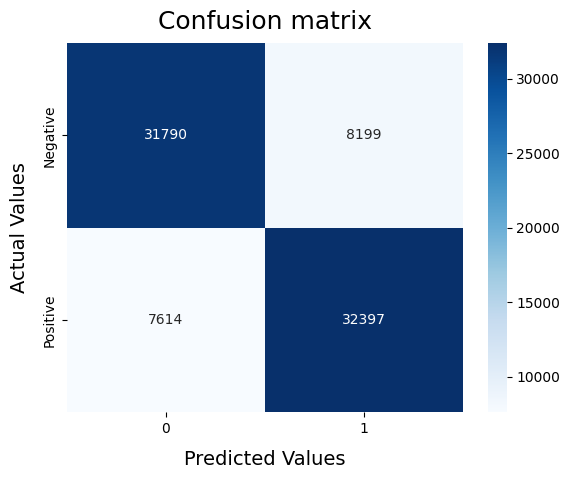

In [15]:
BernoulliNBModel = BernoulliNB()
BernoulliNBModel.fit(x_train, y_train)
modelEvaluate(BernoulliNBModel)

- Linear Support Vector Classification (LinearSVC)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39989
           1       0.81      0.83      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



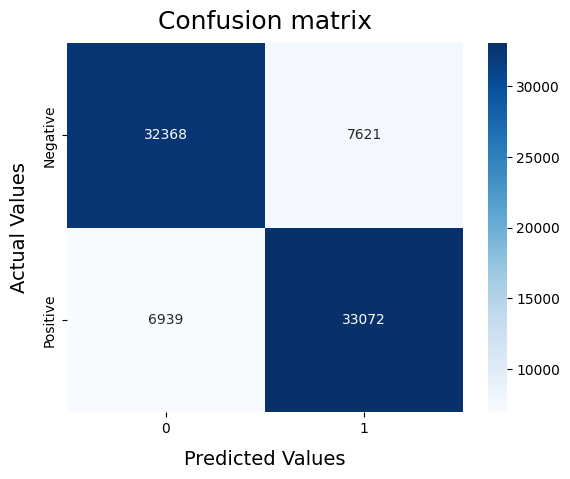

In [16]:
linearSVCModel = LinearSVC()
linearSVCModel.fit(x_train,y_train)
modelEvaluate(linearSVCModel)

- Logistic Regression (LR)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



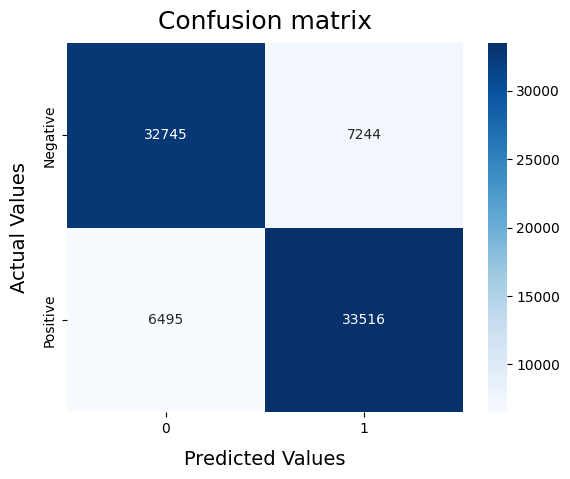

In [17]:
logisticRegressionModel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
logisticRegressionModel.fit(x_train,y_train)
modelEvaluate(logisticRegressionModel)

We can clearly see that Logistic Regression Model is the best model of all different models with an accuracy of 83% while classifying the sentiment of a tweet.

# **Saving models**

- We are going to use Pickle to save Vectoriser, Logistic Regression Model and BernoulliNB Model for later use.

In [18]:
import pickle

file = open("vectoriser-ngram-(1,2).pickle", "wb")
pickle.dump(vectoriser, file)
file.close()

file = open("Sentiment-LR.pickle", "wb")
pickle.dump(logisticRegressionModel, file)
file.close()

file = open("Sentiment-BNB.pickle", "wb")
pickle.dump(BernoulliNBModel, file)
file.close()

# **Using the models**

To use the model for Sentiment Prediction we need to import the Vectoriser and LR Model using Pickle.

The vectoriser can be used to transform data to matrix of TF-IDF Features. While the model can be used to predict the sentiment of the transformed Data. The text whose sentiment has to be predicted however must be preprocessed.

In [19]:
def load_model():
    #Load the vectoriser
    file=open("./vectoriser-ngram-(1,2).pickle", "rb")
    vectoriser = pickle.load(file)
    file.close()
    
    #Load LR model
    file=open("./Sentiment-LR.pickle", "rb")
    LRModel = pickle.load(file)
    file.close()

    return vectoriser, LRModel

In [20]:
def predict(vectoriser, model, text):
    #Predict the sentiment
    textdata = vectoriser.transform(preprocessData(text))
    sentiment = model.predict(textdata)

    #Make a list of text with sentiment
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))

    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [27]:
vectoriserLoaded, LRModel = load_model()

# Text to classify should be in a list.
text = ["Walk away from anything that gives you bad vibes. There is no need to explain or make sense of it. It's your life. Do what makes you happy.",
        "Humans are simply not built for email.",
        "This is a bad tweet"]

df=predict(vectoriserLoaded, LRModel, text)
df.head()

,text,sentiment
0,Walk away from anything that gives you bad vib...,Positive
1,Humans are simply not built for email.,Positive
2,This is a bad tweet,Negative
